# 【例題2.8】

## (6) 洪水追跡計算
### 上流端流量ハイドログラフを作成

問題中の上流端の流量ハイドログラフを計算するプログラムです．

- 計算条件は，エクセルファイル”DischargeCondition.xlsx”をご確認ください．

- 流量の経時変化のデータ("Dischage.xlsx")とグラフ("tQ_2_8_2.pdf")が作成されます．


In [1]:
"""上流端の流量ハイドログラフを以下の式から計算し，グラフとデータを作成するプログラム."""
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定数の設定
GRAVITY_ACCELERATION: float = 9.81  # 重力加速度
INPUT_FILE_NAME = "DischargeCondition.xlsx"
OUTPUT_FILE_NAME = "Dischage.xlsx"
GRAPH_FILE_NAME = "tQ_2_8_2.pdf"
SHEET1_NAME = "計算条件"

#### 上流端ハイドログラフを作成するクラス

- 上流端流量ハイドログラフ：$Q_0(t) = Q_b+(Q_p-Q_b)\left\{\frac{t}{t_p}\exp\left(1-\frac{t}{t_p}\right)\right\}^{c}$

In [2]:
class SetUpstreamDischarge:
    """上流端ハイドログラフを作成するクラス."""

    def __init__(self):
        """データの読み込み."""
        self.data = pd.read_excel(INPUT_FILE_NAME, sheet_name=SHEET1_NAME)
        print(self.data)
        self.Qb = self.data[self.data.columns[1]][0]
        self.Qp = self.data[self.data.columns[1]][1]
        self.tp = self.data[self.data.columns[1]][2]
        self.te = self.data[self.data.columns[1]][3]
        self.C = self.data[self.data.columns[1]][4]

    # 流量を計算
    def __calcHydro(self):
        # 時間間隔とQの計算．時間間隔は10分とする
        self.t = np.linspace(0.0, self.te, int(self.te*3600/600)+1)
        self.Q = self.Qb+(self.Qp-self.Qb)*(self.t/self.tp *
                                            np.exp(1.-self.t/self.tp))**self.C

    # ファイルへの出力
    def __writeFile(self):
        # numpyをpandas形式に変換
        df = pd.DataFrame(self.t, columns=['t(hr)'])
        df['Q(m3/s)'] = self.Q
        # エクセルファイルへの書き出し
        df.to_excel(OUTPUT_FILE_NAME, index=False)

    def graph(self):
        """グラフ作成."""
        plt.figure(figsize=(5, 2.5))
        plt.plot(self.t, self.Q, color='black')
        plt.xlabel('$t$(hr)')
        plt.ylabel('$Q$(m$^s$/s)')
        plt.grid()
        plt.xlim(np.min(self.t), np.max(self.t))
        plt.ylim(0.0,)
        plt.savefig(GRAPH_FILE_NAME, transparent=True, bbox_inches='tight')
        plt.show()

    def getHydroData(self):
        """流量のデータを作成."""
        self.__calcHydro()
        self.__writeFile()

#### main関数

              変数名    数値
0  Qb(m3/s)：ベース流量   200
1  Qp(m3/s)：ピーク流量  2000
2  tp(hr)：ピーク発生時間    12
3   te(hr)：計算終了時間    50
4            C：係数    20


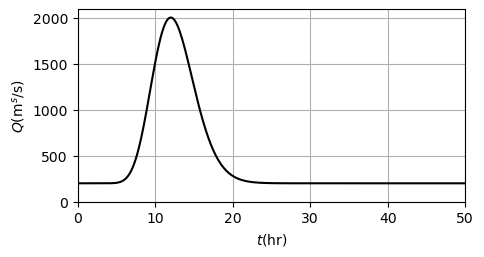

In [3]:
if __name__ == "__main__":
    """main関数."""
    disHydro = SetUpstreamDischarge()  # データの読み込み
    disHydro.getHydroData()  # ハイドログラフの計算とファイルへの出力
    disHydro.graph()  # グラフの作成
    del disHydro